In [7]:
from nb import MyNaiveBayesClassifier
from movie_reviews import makeData
import random
import matplotlib.pyplot as plt
from sklearn import metrics

In [8]:
def make_table(posname, negname):
    pos = open(posname).read().splitlines()
    neg = open(negname).read().splitlines()

    for i in range(len(pos)):
        pos[i] = [pos[i]]
        pos[i].append('+')
    for i in range(len(neg)):
        neg[i] = [neg[i]]
        neg[i].append('-')

    data = pos+neg
    return data

In [9]:
movie_nb = MyNaiveBayesClassifier()
data = make_table('movie_reviews/pos.txt', 'movie_reviews/neg.txt')

X = []
y = []

for i in range(len(data)):
    X.append([data[i][0]])
    y.append(data[i][1])

movie_nb.fit(X, y)

In [10]:
#TEST predictor
pred = movie_nb.predict([['bad', 'gay', 'sad'], ['gay', 'fun']])
print("TESTER")
print(pred)

TESTER
['-', '+']


In [21]:
#POSITIVE TEST BAG PREDICTION
posTestBag, negTestBag = makeData.main()
i = 1
overall_neg = 0
overall_pos = 0
print("POSITIVE REVIEW PREDICTIONS:")
for review in posTestBag:
    predicted = movie_nb.predict(review)
    pos, neg = movie_nb.count_prediction(predicted)

    #skew = movie_nb.get_pos_skew()
    file_neg = open("movie_reviews/neg.txt","r")
    neg_dict_count = len(file_neg.readlines())

    file_pos = open("movie_reviews/pos.txt","r")
    pos_dict_count = len(file_pos.readlines())

    skew = pos_dict_count/neg_dict_count
    senti = ''
    if pos > neg*skew:
        senti = 'POSITIVE'
        overall_pos+=1
    else:
        senti = 'NEGATIVE'
        overall_neg+=1
        
    print("\nREVIEW " + str(i))
    print("+: " + str(pos))
    print("-: " + str(neg))
    print("SENTIMENT: " + senti)
    i+=1
print("\nTOTAL POSITIVE:" + str(overall_pos))
print("TOTAL NEGATIVE:" + str(overall_neg))

POSITIVE REVIEW PREDICTIONS:


AttributeError: 'MyNaiveBayesClassifier' object has no attribute 'count_prediction'

In [ ]:
#NEGATIVE TEST BAG PREDICTION
posTestBag, negTestBag = makeData.main()
i = 1
overall_neg = 0
overall_pos = 0
print("NEGATIVE REVIEW PREDICTIONS:")
for review in negTestBag:
    predicted = movie_nb.predict(review)
    pos, neg = movie_nb.count_prediction(predicted)

    #skew = movie_nb.get_pos_skew()
    file_neg = open("movie_reviews/neg.txt","r")
    neg_dict_count = len(file_neg.readlines())

    file_pos = open("movie_reviews/pos.txt","r")
    pos_dict_count = len(file_pos.readlines())

    skew = pos_dict_count/neg_dict_count
    senti = ''
    if pos > neg*skew:
        senti = 'POSITIVE'
        overall_pos+=1
    else:
        senti = 'NEGATIVE'
        overall_neg+=1
        
    print("\nREVIEW " + str(i))
    print("+: " + str(pos))
    print("-: " + str(neg))
    print("SENTIMENT: " + senti)
    i+=1
print("\nTOTAL POSITIVE:" + str(overall_pos))
print("TOTAL NEGATIVE:" + str(overall_neg))

NEGATIVE REVIEW PREDICTIONS:

REVIEW 1
+: 231
-: 193
SENTIMENT: POSITIVE

REVIEW 2
+: 154
-: 157
SENTIMENT: NEGATIVE

REVIEW 3
+: 214
-: 182
SENTIMENT: POSITIVE

REVIEW 4
+: 150
-: 126
SENTIMENT: POSITIVE

REVIEW 5
+: 157
-: 131
SENTIMENT: POSITIVE

REVIEW 6
+: 228
-: 141
SENTIMENT: POSITIVE

REVIEW 7
+: 154
-: 121
SENTIMENT: POSITIVE

REVIEW 8
+: 205
-: 143
SENTIMENT: POSITIVE

REVIEW 9
+: 151
-: 99
SENTIMENT: POSITIVE

REVIEW 10
+: 160
-: 89
SENTIMENT: POSITIVE

REVIEW 11
+: 391
-: 317
SENTIMENT: POSITIVE

REVIEW 12
+: 121
-: 97
SENTIMENT: POSITIVE

REVIEW 13
+: 235
-: 200
SENTIMENT: POSITIVE

REVIEW 14
+: 116
-: 92
SENTIMENT: POSITIVE

REVIEW 15
+: 216
-: 164
SENTIMENT: POSITIVE

REVIEW 16
+: 172
-: 169
SENTIMENT: NEGATIVE

REVIEW 17
+: 62
-: 51
SENTIMENT: POSITIVE

REVIEW 18
+: 198
-: 153
SENTIMENT: POSITIVE

REVIEW 19
+: 126
-: 156
SENTIMENT: NEGATIVE

REVIEW 20
+: 200
-: 156
SENTIMENT: POSITIVE

REVIEW 21
+: 188
-: 164
SENTIMENT: POSITIVE

REVIEW 22
+: 148
-: 87
SENTIMENT: POSITI

In [14]:
#Give a random review and pos/neg prediction
posTestBag, negTestBag = makeData.main()
testBag = posTestBag + negTestBag
rand = random.randint(0,len(testBag)-1)
rand_review = testBag[rand]
rand_predict = movie_nb.predict(rand_review)
print("RANDOM REVIEW + CORPORA")
print(rand_predict)
print(rand_review)

RANDOM REVIEW + CORPORA
['+', '-', '+', '+', '+', '+', '+', '-', '-', '+', '-', '+', '-', '-', '-', '-', '+', '-', '+', '+', '+', '+', '+', '+', '-', '+', '-', '-', '+', '+', '+', '-', '+', '-', '-', '-', '+', '+', '+', '+', '-', '+', '-', '-', '-', '-', '-', '-', '+', '+', '-', '-', '+', '-', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '-', '+', '+', '-', '-', '+', '+', '+', '-', '-', '-', '+', '-', '+', '-', '+', '+', '-', '-', '-', '+', '+', '+', '+', '-', '+', '+', '-', '+', '+', '-', '+', '-', '+', '+', '-', '+', '+', '-', '+', '-', '-', '+', '-', '-', '+', '+', '+', '-', '-', '+', '+', '-', '+', '+', '+', '+', '-', '+', '+', '-', '+', '+', '+', '-', '+', '+', '+', '+', '-', '-', '-', '+', '+', '+', '-', '+', '+', '+', '-', '-', '+', '+', '+', '+', '+', '-', '+', '+', '+', '-', '-', '-', '+', '+', '-', '+', '+', '-', '-', '-', '+', '+', '+', '-', '+', '+', '+', '+', '+', '+', '-', '+', '-', '+', '+', '+', '+', '-', '+', '+', '+', '+', '+', '+', '+', '-', '-', '-', '-', '-', 

['+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '+', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']

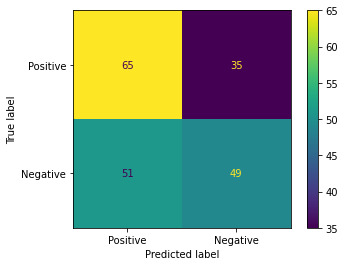

In [31]:
def create_martix(truth, senti_array):
    truth_arr = []
    false_arr = []

    if truth == '+':
        for ch in senti_array:
            if ch == '+':
                truth_arr.append('+')
            if ch == '-':
                false_arr.append('-')
    else:
        for ch in senti_array:
            if ch == '+':
                false_arr.append('+')
            if ch == '-':
                truth_arr.append('-')
    return truth_arr, false_arr

actual = []
predicted = []

testBag = posTestBag + negTestBag

for i in range(100):
    actual.append('+')

for i in range(100):
    actual.append('-')

pos_arr = movie_nb.predict(posTestBag)
neg_arr = movie_nb.predict(negTestBag)

a1, p1 = create_martix('+', pos_arr)
a2, p2 = create_martix('-', neg_arr)

# actual.append(a1)
# actual.append(a2)
# actual = a1 + a2

# predicted.append(p1)
# predicted.append(p2)
# predicted = p1 + p2
predicted = pos_arr + neg_arr

print(actual)
print(predicted)

confusion_matrix = metrics.confusion_matrix(actual, predicted)
print(confusion_matrix)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Positive", "Negative"])

cm_display.plot()
plt.show()